In [ ]:
#Logistic regression
#Dataset : parkinsons.data oxford, from uci repository

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
raw_df = pd.read_csv("parkinsons.data")

In [4]:
num_data = raw_df.loc[:, raw_df.columns != 'status'].values[:,1:]
#numerical data to be normalized, doesn't include the status or name columns
hasParkinsons = raw_df.loc[:, 'status'].values
#binary attribute column - 0 = healthy, 1 = has parkinsons

In [5]:
scale = MinMaxScaler((-1,1))
#transforms data to be on the scale of -1 to 1
norm_data = scale.fit_transform(num_data)
#normalized data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(norm_data, hasParkinsons,test_size = 0.25, random_state = 42, shuffle=True)
#splits data into testing and training sets

In [7]:
regres = LogisticRegression()
#initializing regression obj
regres = regres.fit(x_train, y_train)
#fitting data to model


In [8]:
y_pred = regres.predict(x_test)
#predicting y based on x test values
print(regres.score(x_test, y_test))
#model is accurate, has score of 0.8979591836734694

0.8979591836734694


Logistic: ROC AUC=0.773


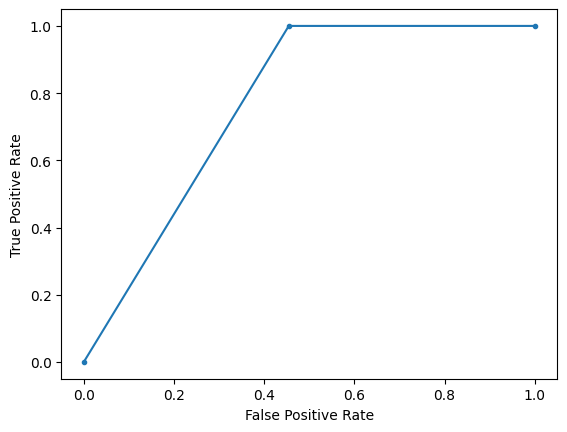

In [11]:
#draw roc auc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the plot
pyplot.show()

In [10]:
#showing the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 6,  5],
       [ 0, 38]], dtype=int64)